In [2]:
# Check the kernel
import sys
print(sys.executable)

/home/rpx/miniconda3/envs/qPy3/bin/python


In [6]:
data_dir = '/datasets/kaggle/competitions/tgs-salt-identification-challenge'

In [1]:
!ls '/datasets/kaggle/competitions/tgs-salt-identification-challenge'

depths.csv  sample_submission.csv  test  test.zip  train  train.csv  train.zip


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

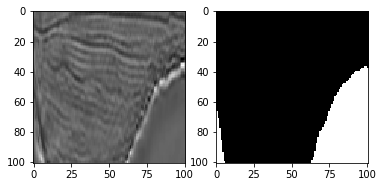

In [10]:
# Plot and check how the images look like
img1 = load_img(data_dir + '/train/images/5b7c160d0d.png', color_mode='grayscale')
mask1 = load_img(data_dir + '/train/masks/5b7c160d0d.png', color_mode='grayscale')
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.imshow(mask1)
plt.show()

In [18]:
# check the pixel values of masks. Hypothesis is it shall contain 0 and 255
import numpy as np
m1 = np.array(mask1)

In [32]:
# No. of white pixels and no. of black pixels shall be equal to total number of pixels 
len(m1[m1 == 255]) + len(m1[m1 == 0]) == (len(m1) * len(m1))

True

In [42]:
# Check how many masks does not contain any of the salt contents
import os
maskurls = os.walk(data_dir + '/train/masks')
maskids = next(maskurls)[2]

In [46]:
mask_ids_with_no_salt = []
for i in range(len(maskids)):
    m_img = load_img(data_dir + '/train/masks/{}'.format(maskids[i]), color_mode='grayscale')
    m_arr = np.array(m_img)
    if(len(m_arr[m_arr == 255]) == 0):
        mask_ids_with_no_salt.append(maskids[i])

1562
4000


In [47]:
print("Total masks: {}, Masks with no salt: {}".format(len(maskids), len(mask_ids_with_no_salt)))

Total masks: 4000, Masks with no salt: 1562


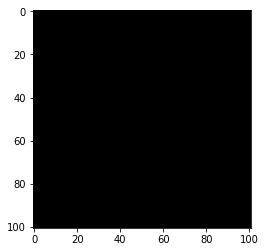

In [49]:
# sanity check
m1_no_salt = load_img(data_dir + '/train/masks/{}'.format(mask_ids_with_no_salt[0]), color_mode='grayscale')
plt.imshow(m1_no_salt)
plt.show()